# 🏨 Hotel Booking Data Analysis

## 📘 Dataset Overview
The **Hotel Booking Demand Dataset** contains detailed booking information for two types of hotels — a **City Hotel** and a **Resort Hotel** — collected between **2015 and 2017**.  
It includes over **119,000 booking records** and **32 features**, covering customer demographics, booking dates, length of stay, number of guests, special requests, and cancellation information.

Each record represents a single hotel booking and provides valuable insights into **guest behavior, booking patterns, and factors influencing cancellations**.

### 🔑 Key Features
- `hotel` – Type of hotel (City or Resort)  
- `is_canceled` – Indicates if the booking was canceled  
- `lead_time` – Days between booking and arrival  
- `arrival_date_year`, `arrival_date_month` – Booking date details  
- `country` – Guest’s country of origin  
- `stays_in_weekend_nights`, `stays_in_week_nights` – Duration of stay  
- `adults`, `children`, `babies` – Guest composition  
- `meal`, `market_segment`, `distribution_channel` – Booking details  
- `agent`, `company` – Booking agent or company (some missing values)

---

## 🎯 Objective
The main goal of this project is to **analyze hotel booking data** to identify patterns, trends, and insights that can help hotels:
- Improve booking efficiency  
- Reduce cancellations  
- Understand customer demographics and preferences  
- Optimize business decisions (e.g., pricing, marketing, resource allocation)

---

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
hotel_bookings=pd.read_csv("C:/Users/adith/Desktop/DATA_ANALYTICS/FINAL_PROJECT/dataset/hotel_bookings.csv")

In [91]:
df=hotel_bookings.copy()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [93]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


## ⚠️ Missing Values Not Detected by `info()`

When inspecting the dataset using `df.info()`, it appears that there are **no missing values**.  
However, this is because the Kaggle version of the Hotel Booking dataset has been **pre-cleaned** — missing values were replaced with placeholders such as `0`, `'Unknown'`, or empty strings.

While this makes the dataset look complete, these placeholders actually represent **implicit missing data**.  
For example:
- `company = 0` → No company associated with the booking  
- `agent = 0` → Booking made without an agent  
- `country = 'Unknown'` → Missing country information

During data cleaning, we will treat these values as missing and handle them appropriately — for example, by converting them back to `NaN`, imputing them, or dropping irrelevant columns.


In [94]:
missing_values=[0, '0', 'Unknown', 'unknown', 'None', 'none', '', 'NA', 'N/A','null','NULL','Null']

for col in df.columns:
    total_missing=df[col].isna().sum()

    if df[col].dtype =='object':
        total_missing+=df[col].isin(missing_values).sum() 
        
    if total_missing >0:
        print(f"{col}:{total_missing}")

children:4
country:488
agent:16340
company:112593


Drop the company column –
This column has over 90% missing values, so it provides little useful information for analysis.

In [95]:
df.drop(columns=['company'], inplace=True)

### Replace Placeholder Missing Values  

In the dataset, some columns use **placeholder values** instead of real missing values (`NaN`).  
Before analysis, it’s important to convert them so pandas can correctly detect and handle them.

**Columns and their placeholders:**  

- `agent` → `NULL` means no agent was assigned  
- `country` → `'NULL'` represents missing country  





In [96]:

df['agent']=df['agent'].replace('NULL',pd.NA)
df['country']=df['country'].replace('NULL', pd.NA)

In [97]:
df.isna().sum()[df.isna().sum()>0]

children        4
country       488
agent       16340
dtype: int64

###  Checking for Duplicate Records

Before moving forward, it is essential to verify whether the dataset contains any **duplicate rows**,  
as they can distort analysis and lead to biased insights.

In [98]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 32001


In [99]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"After removing duplicates: {df.duplicated().sum()} duplicate rows remain.")


After removing duplicates: 0 duplicate rows remain.


Fill agent with 0 –
Here, 0 indicates no agent was involved in the booking, so it’s a valid replacement.

Fill country with the most frequent country (mode) –
This ensures missing countries are filled with the most common country in the dataset,

Fill children with 0 –
Since 0 children means “no children,” this is a reasonable and meaningful substitution.

In [100]:
df['agent']=df['agent'].fillna(0)
df['country']=df['country'].fillna(df['country'].mode()[0])
df['children']=df['children'].fillna(0)

###  Final Check for Missing Values  

After replacing placeholders and filling or dropping missing values,  
we perform a final check to ensure the dataset is completely clean.


In [101]:
df.isna().sum().sum()

np.int64(0)

### Summary Statistics Overview

- Dataset has **87,389 records** and **31 columns** covering booking details, guests, and hotel info.  
- **City Hotel** dominates bookings (~61%), with **August** as the peak month.  
- **27%** of bookings were **canceled**, showing a moderate cancellation rate.  
- Average **lead time** is **80 days**, indicating most guests book well in advance.  
- Typical stay: **1 weekend night** and **2 weeknights**, suggesting short visits.  
- Average **ADR (daily rate)** is **€106**, but shows high variation — a few outliers exist.  
- Majority of guests are **Transient customers** with **No Deposit** bookings.  
- **Special requests** are mostly low (average < 1).  

**Key Insights:**  
- City Hotels attract most bookings, but Resort Hotels may yield higher revenue.  
- High lead time and ADR variability suggest opportunities for pricing optimization.  
- Seasonality (especially August) strongly influences demand.


In [102]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87389,87389.000000,87389.000000,87389.000000,87389,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000,...,87389.000000,87389,87389.000000,87389.000000,87389,87389.000000,87389.000000,87389.000000,87389,87389
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,NaN,No Deposit,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53426,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,...,NaN,86244,NaN,NaN,71982,NaN,NaN,NaN,63364,211
mean,NaN,0.274920,79.897195,2016.210313,NaN,26.837760,15.815698,1.005321,2.625548,1.875842,...,0.271625,NaN,81.008193,0.749625,NaN,106.339070,0.084233,0.698589,NaN,NaN
std,NaN,0.446477,86.053274,0.686094,NaN,13.674352,8.835244,1.031935,2.053591,0.626490,...,0.727270,NaN,109.946820,10.016130,NaN,55.013097,0.281544,0.831950,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,NaN,9.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,NaN,9.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,...,0.000000,NaN,234.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


### Lead Time Distribution (Histogram)

- Most guests book **close to arrival**, showing a **right-skewed** pattern.  
- Majority have **short to moderate lead times**; few book very early.  
- **Outliers** (lead_time > 500) indicate rare long-term bookings.


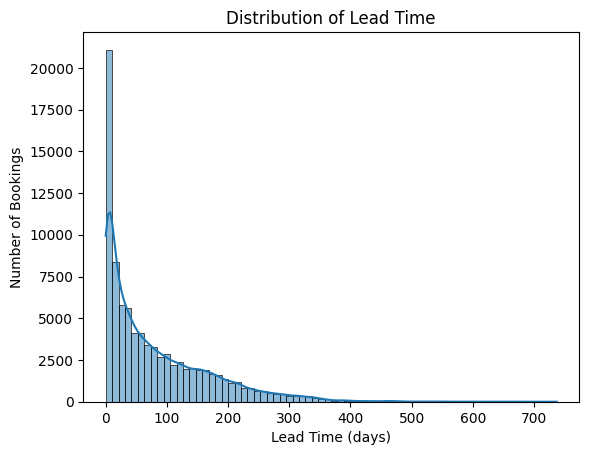

In [103]:
sns.histplot(df['lead_time'], bins=70, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.show()


We used **count plots** to visualize the distribution of `meal`.  
  
- **Bed & Breakfast (BB)** is the most common meal plan chosen by guests.

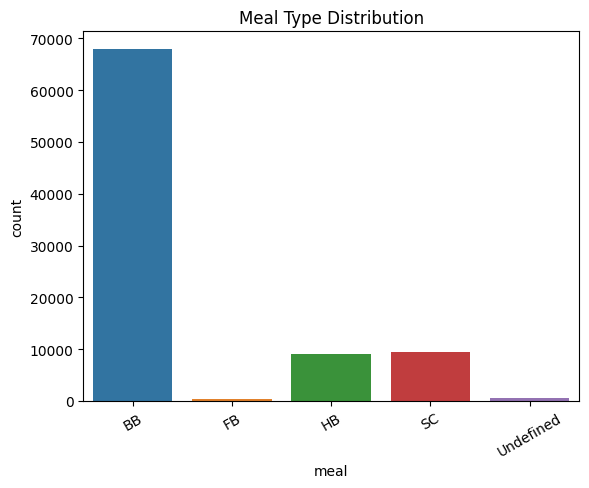

In [104]:
sns.countplot(data=df, x='meal', hue='meal')
plt.title('Meal Type Distribution')
plt.xticks(rotation=30)
plt.show()

###  Analysis of Categorical Variables vs Cancellation

We visualized key categorical features — **Hotel Type**, **Customer Type**, **Meal Type**, and **Deposit Type** — using stacked bar charts to understand their impact on booking cancellations.

#### 🔍 Key Observations:

- **Hotel Type:**  
  - **City Hotel:** ~40% of bookings were canceled.  
  - **Resort Hotel:** ~20% canceled.  
  - Note: City Hotels have almost **double the total bookings**, so they contribute more to overall cancellations.

- **Customer Type:**  
  - **Transient customers** have the highest cancellations at ~40%.  
  - Other customer types (Contract, Group) have lower cancellation rates.

- **Meal Type:**  
  - **BB (Bed & Breakfast):** ~30% cancellations.  
  - Other meal types (HB, FB, SC) show much lower cancellations.

- **Deposit Type vs Cancellations**
  - **No Deposit:** ~25% of bookings were canceled, representing the **majority of total bookings**.  
  - **Non-Refund:** Nearly **90% cancellations**, though they make up **less than 5%** of all bookings.

#### 💡 Summary:
- **Highest cancellation rates** are seen in **City Hotels**, **Transient customers**, and **No Deposit bookings**.  
- **Meal plan** has minor influence.  
- Understanding these patterns helps predict cancellations and inform hotel booking policies.


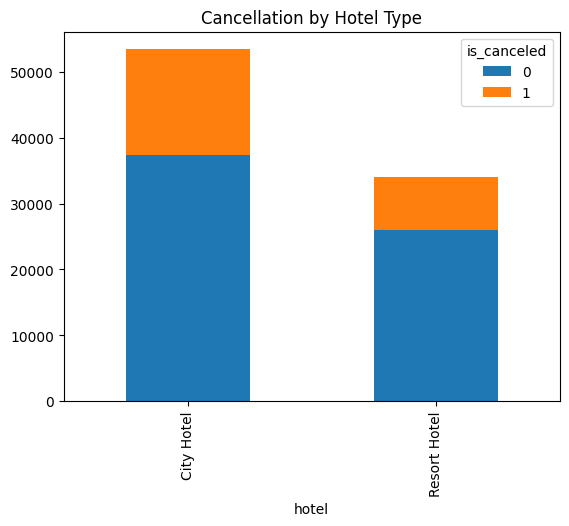

In [105]:
pd.crosstab(df['hotel'], df['is_canceled']).plot(kind='bar', stacked=True)
plt.title('Cancellation by Hotel Type')
plt.show()

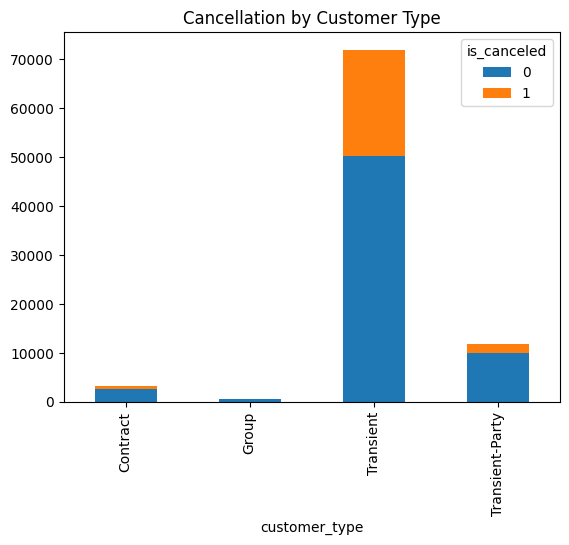

In [106]:
pd.crosstab(df['customer_type'],df['is_canceled']).plot(kind='bar', stacked=True)
plt.title('Cancellation by Customer Type')
plt.show()

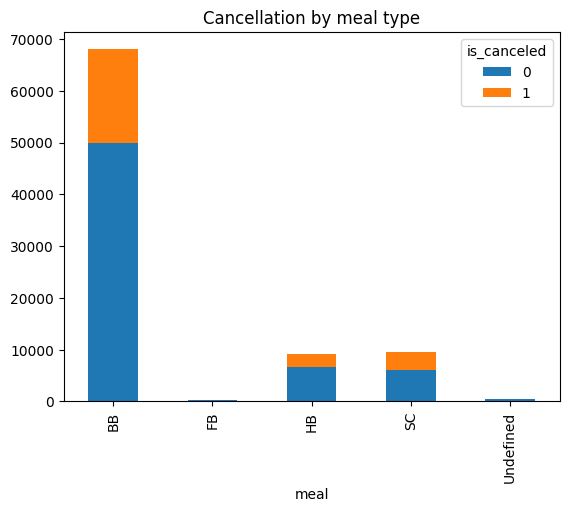

In [107]:
pd.crosstab(df['meal'],df['is_canceled']).plot(kind='bar', stacked=True)
plt.title('Cancellation by meal type')
plt.show()

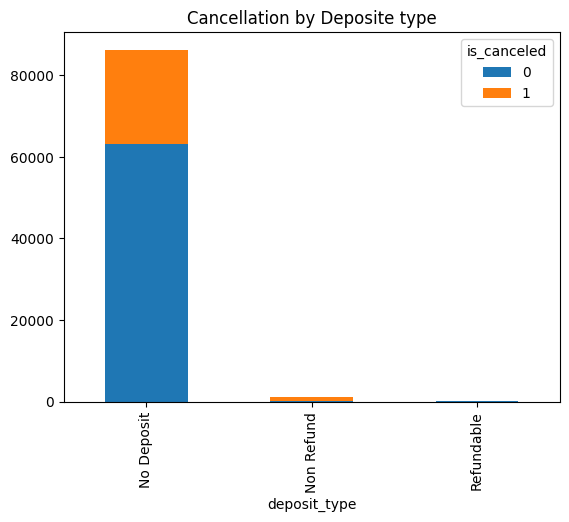

In [108]:
pd.crosstab(df['deposit_type'],df['is_canceled']).plot(kind='bar', stacked=True)
plt.title('Cancellation by Deposite type')
plt.show()

###  Numeric Variables vs Cancellation (Boxplots)

We analyzed numeric features — `lead_time`,  `stays_in_weekend_nights`, `stays_in_week_nights` — using boxplots to see how their distributions differ between canceled and non-canceled bookings.

**Observations:**
- **Lead Time:** Canceled bookings tend to have **longer lead times**. Guests booking far in advance are slightly more likely to cancel.
- **Stays in Weekend/Week Nights:** Canceled bookings often have **shorter stays**, but the difference is minor.




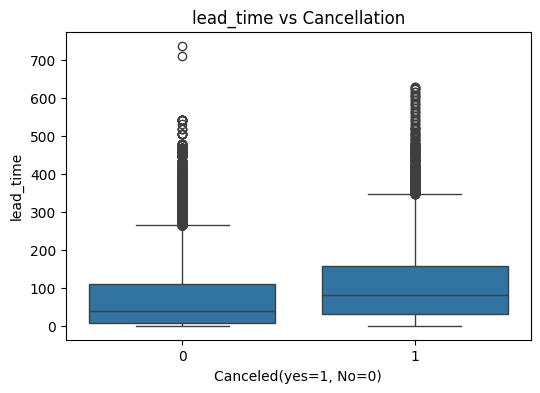

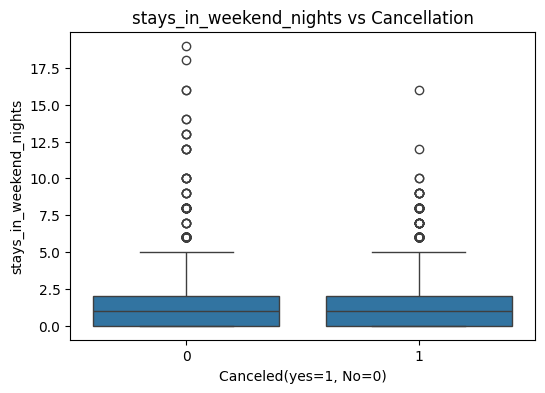

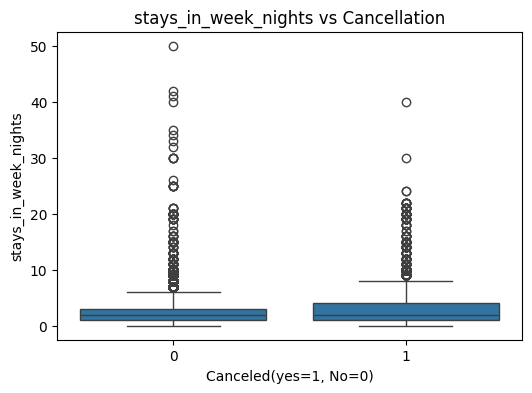

In [109]:
numerical_col=['lead_time','stays_in_weekend_nights','stays_in_week_nights']

for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(df, x='is_canceled', y=col)
    plt.title(f'{col} vs Cancellation')
    plt.xlabel('Canceled(yes=1, No=0)')
    plt.show()

#### 🧩 Key Observations:
 


- There is a **negative correlation** between **`total_of_special_requests`** and **`is_canceled`**, indicating that guests who make more special requests are **less likely to cancel** their bookings. 


- A **positive correlation** can be seen between **`adr` (Average Daily Rate)** and both **`adults`** and **`children`**, meaning bookings with more guests generally have a **higher average room rate**.

- A **strong positive correlation** exists between **`is_repeated_guest`** and **`previous_bookings_not_canceled`**, which suggests that loyal or repeat customers are more consistent and **tend to complete their bookings without cancellation**.


A **strong positive correlation** is observed between **`previous_bookings_not_canceled`** and **`previous_cancellations`**.  

In other words, frequent bookers may both cancel and complete bookings more often simply because they interact with the hotel more frequently.

This relationship suggests that **booking frequency** plays a key role in understanding customer behavior patterns.



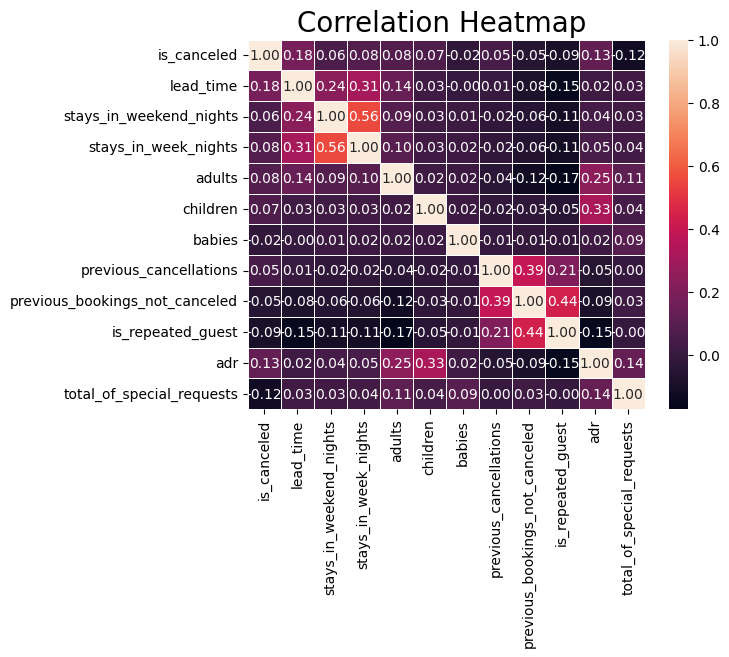

In [110]:
corr_features = [
    'is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'previous_cancellations',
    'previous_bookings_not_canceled', 'is_repeated_guest',
    'adr', 'total_of_special_requests'
]

corr=df[corr_features].corr()

sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap ', fontsize=20)
plt.show()

### ADR (Average Daily Rate) Distribution

- **ADR** shows a **steady upward trend** with a **small dip in between**.  
- The histogram peaks in the **€50–€100 range**, indicating most room rates fall within this range.  
- A few **high ADR values** suggest the presence of outliers or premium bookings.


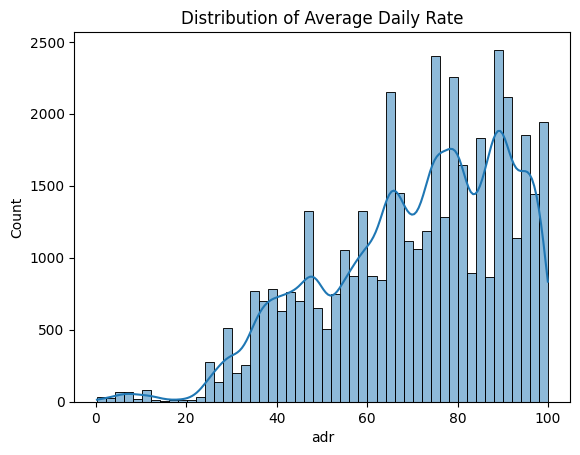

In [111]:

df = df[(df['adr'] < 100) & (df['adr'] > 0)]    #removing unrealistic values

sns.histplot(df['adr'], bins=50, kde=True)

plt.title('Distribution of Average Daily Rate')
plt.show()

### Lead Time (Box Plot Analysis)

- Most bookings occur within **0 to 100 days** before arrival.  
- The **median lead time** is around **45 days**, showing that half of the guests book within this period.  
- A few **outliers** with very long lead times indicate some early or advance planners.


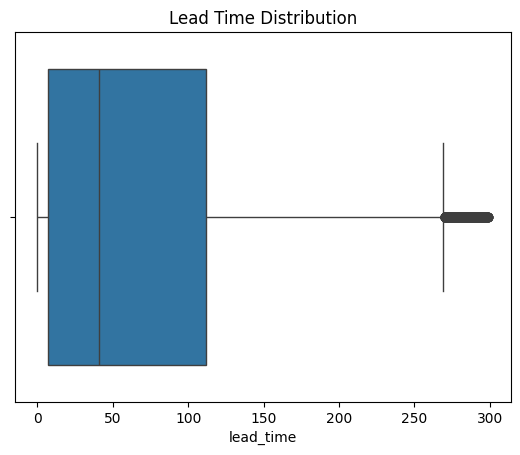

In [112]:
df=df[df['lead_time']<300]
sns.boxplot( x=df['lead_time'])
plt.title('Lead Time Distribution')
plt.show()

### Stay Duration Analysis

- As expected, most guests stayed **0 to 3 days on weekends** and **0 to 8 days on weekdays**.  
- This suggests that the majority of bookings are for **short trips or business stays**, rather than long vacations.


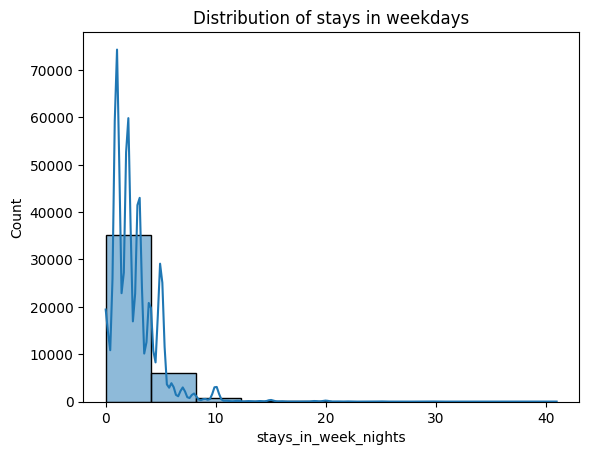

In [113]:
sns.histplot(df['stays_in_week_nights'], bins=10, kde=True)
plt.title('Distribution of stays in weekdays')
plt.show()

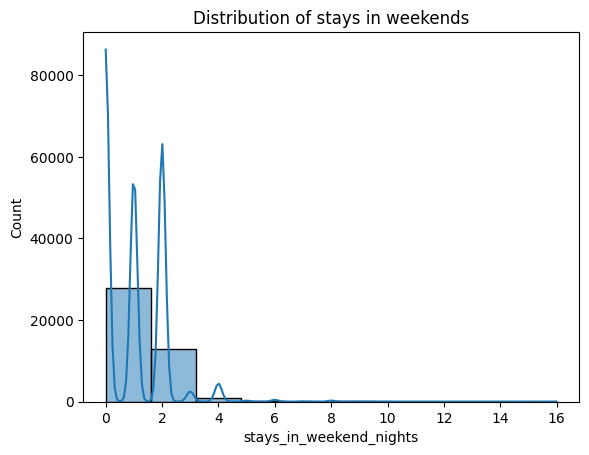

In [114]:
sns.histplot(df['stays_in_weekend_nights'], bins=10, kde=True)
plt.title('Distribution of stays in weekends')
plt.show()

### Country-wise Booking Distribution

From the analysis of guest origin, it is observed that **Portugal** accounts for the **highest number of bookings**, making it the dominant source market for the hotel.  

The next major contributors are **Great Britain** and **France**, each having roughly **one-third of the bookings compared to Portugal**.  

This indicates that while the hotel attracts an international audience, **Portugal remains the core customer base**, and targeted marketing or loyalty programs in this region could further strengthen business performance.


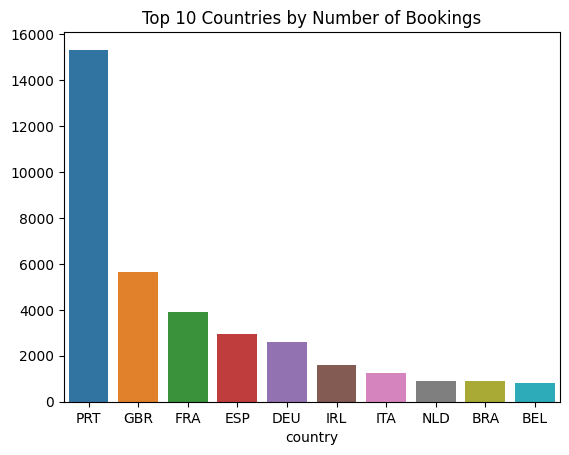

In [115]:
top_countries= df['country'].value_counts().head(10)

sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index)
plt.title('Top 10 Countries by Number of Bookings')
plt.show()

**Observations:**
- Outliers are clearly visible in both plots, especially in ADR, indicating a few extremely high-priced bookings.
- Surprisingly, the number of **special requests** shows **no significant impact** on cancellations — guests with more or fewer requests cancel at similar rates.
- **Canceled bookings** tend to have a **slightly higher ADR**, suggesting that bookings with higher room rates might be more prone to cancellation.

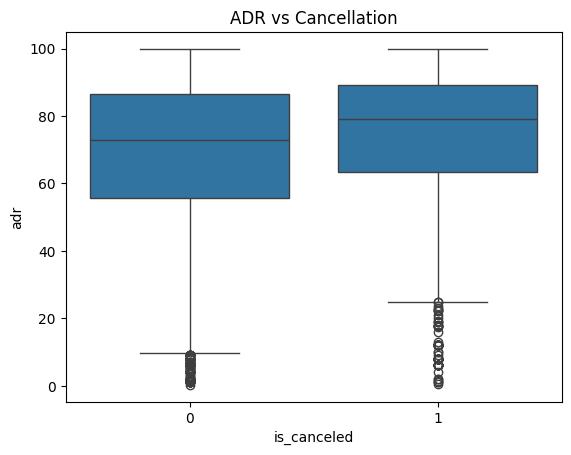

In [116]:
sns.boxplot(df, y='adr', x='is_canceled')
plt.title('ADR vs Cancellation')
plt.show()

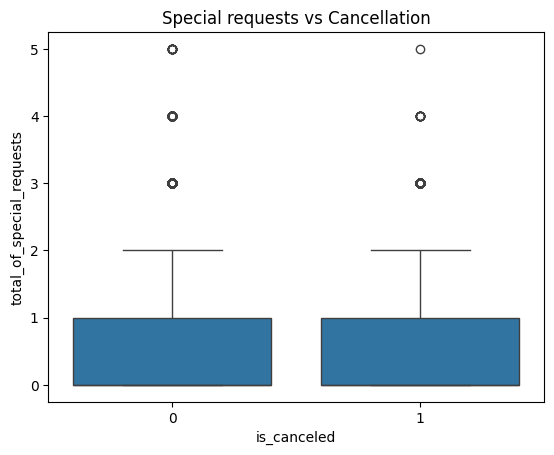

In [117]:
sns.boxplot(df, y='total_of_special_requests', x='is_canceled')
plt.title('Special requests vs Cancellation')
plt.show()

### Monthly Revenue Analysis

We calculated total revenue by multiplying **Average Daily Rate (ADR)** with the **total number of nights stayed** (weekdays + weekends).  

From the chart, we can see that **March** generated the **highest revenue**, indicating a seasonal demand peak — possibly due to holidays or travel trends.  
This insight helps the hotel allocate resources and plan marketing campaigns more effectively during high-demand months.


In [118]:
df['total_revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])


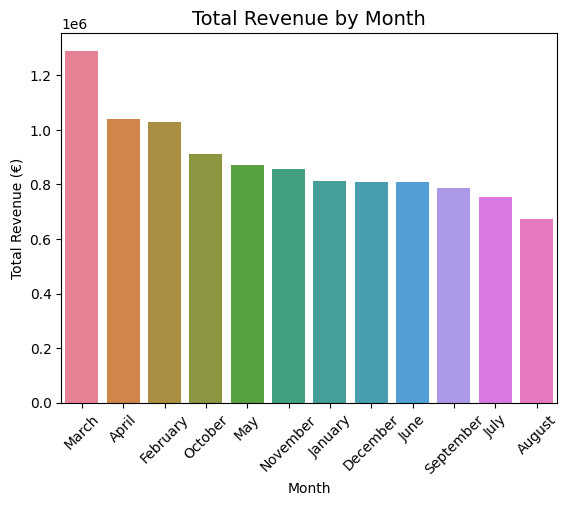

In [119]:
monthly_revenue = df.groupby('arrival_date_month')['total_revenue'].sum().sort_values(ascending=False)

sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, hue=monthly_revenue.index)
plt.title('Total Revenue by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue (€)')
plt.xticks(rotation=45)
plt.show()

### Revenue Share by Customer Type

The pie chart shows the **percentage contribution of each customer type** to the hotel’s total revenue.

It can be observed that **Transient customers** dominate the revenue share, followed by **Transient-Party** and **Contract** types.  
**Group customers** contribute the least to total revenue.

This indicates that **individual and small-group travelers** are the main revenue drivers, and strategies such as loyalty programs or personalized offers could help retain these high-value guests.


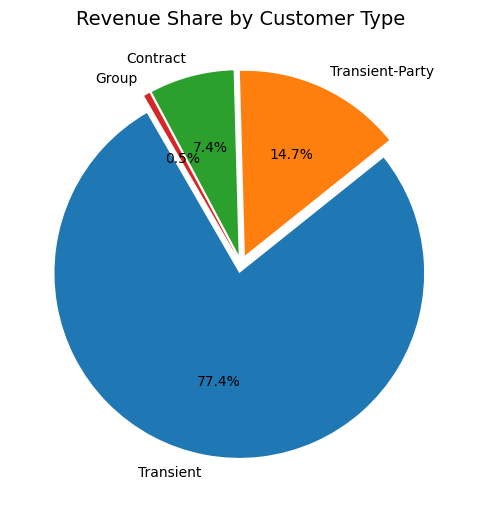

In [128]:

customer_revenue = df.groupby('customer_type')['total_revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,6))
plt.pie(
    customer_revenue,
    labels=customer_revenue.index,
    autopct='%1.1f%%',
    startangle=120,
    explode=[0.05]*len(customer_revenue)
)
plt.title('Revenue Share by Customer Type', fontsize=14)
plt.show()

# Hotel Booking Analysis: Executive Summary

## 🎯 Project Objective
Analyze hotel booking data to extract actionable insights for:
- Improving **booking efficiency**
- Reducing **cancellations**
- Understanding **customer behavior and preferences**
- Optimizing **pricing, revenue, and marketing strategies**

---

## 1️⃣ Booking Patterns & Efficiency

- **Lead time:** Most bookings occur **0–100 days** before arrival; median **45 days**.  
- **Stay duration:** Typical stay is **1 weekend night + 2 weeknights**.  
- **Insight:** Peak booking periods can be prioritized for **staff allocation and room management**.  
- **Actionable Recommendation:** Offer early-bird incentives for long lead-time bookings to smooth occupancy and reduce last-minute cancellations.

---

## 2️⃣ Cancellations

- **Overall rate:** ~27%  
- **High-risk segments:**
  - City Hotels (~40% cancellations)  
  - Transient guests (~40%)  
  - No Deposit bookings (~25%)  
  - Non-Refund bookings (~90%) but <5% of bookings  
- **Observation:** Guests with **more special requests** cancel less; longer lead times slightly increase cancellations.  
- **Actionable Recommendation:** Introduce **reminder emails, flexible deposit options, or small incentives** for high-risk bookings to reduce cancellations.

---

## 3️⃣ Customer Demographics & Preferences

- **Customer type:** Majority are **Transient**, followed by Transient-Party and Contract guests.  
- **Meal plan:** Bed & Breakfast (BB) is most common.  
- **Country of origin:** Portugal leads; Great Britain and France follow (~1/3 of Portugal’s bookings).  
- **Actionable Recommendation:**  
  - Target **Portugal** with loyalty programs or personalized offers.  
  - Design **special packages** for Transient guests, especially BB bookings, to increase repeat visits.

---

## 4️⃣ Revenue & Pricing Insights

- **ADR (Average Daily Rate):** Peaks in €50–€100; high ADR bookings exist as outliers.  
- **Monthly revenue:** March generates the **highest revenue**, while **August has the highest booking volume**.  
- **Customer contribution:** Transient guests drive the majority of revenue; Group bookings contribute the least.  
- **Insight:** High volume (August) does not necessarily equal high revenue.  
- **Actionable Recommendations:**  
  - **Dynamic pricing:** Increase ADR in August for peak occupancy.  
  - **Promotions:** Offer packages in March to maximize already high revenue.  
  - **Upselling:** Target high-volume months with add-ons (meals, special requests) to boost profit.

- **Correlations:**  
  - ADR rises with number of adults and children — larger groups pay more.  
  - Repeat guests tend to **complete bookings** consistently, reducing cancellation risk.  
- **Actionable Recommendation:** Incentivize repeat bookings with loyalty discounts and premium packages.

---

## 5️⃣ Key Recommendations

- Focus on **City Hotels** and **Transient guests** for marketing and upselling opportunities.  
- Use **seasonal insights** (August: high volume, March: high revenue) to adjust pricing and promotions.  
- Implement **flexible deposit policies** and **reminder systems** to reduce cancellations.  
- Develop **loyalty programs and targeted campaigns** for repeat guests and high-value markets (Portugal, larger groups).  
- Leverage **ADR trends and group size correlations** for strategic revenue optimization.
